In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize

In [2]:
# The bank has been experiencing customers alot of customers closing accounts and migrating to other banks leading to loss 
# revenue income. We have been tasked to analyze the bank churn dataset to predict which customers are likely to leave the
# bank so that necessary actions can be implemented to retain the customer.
# First we start by uploading the database into python and prepare it for analysis

db = pd.read_csv("C://Users/wawes/OneDrive/Desktop/ZETECH UNIVERSITY/Y4S2/MACHINE LEARNING/Topic 2/churn.csv")

In [3]:
# here we display a summary of the database to familiarise with the data and fields.

db

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# We have noted that some fields such as row number, customer ID and surname are not useful in the analysis of the dataset
# so we decided to delete the three rows and desplay the results below

del db['RowNumber']
del db['CustomerId']
del db['Surname']
db

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# From the database structure, we view the data types used which are int, object and float. There are no null values in the
# database with a total of 14 columns and 10,000 entries

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<Axes: xlabel='IsActiveMember', ylabel='Exited'>

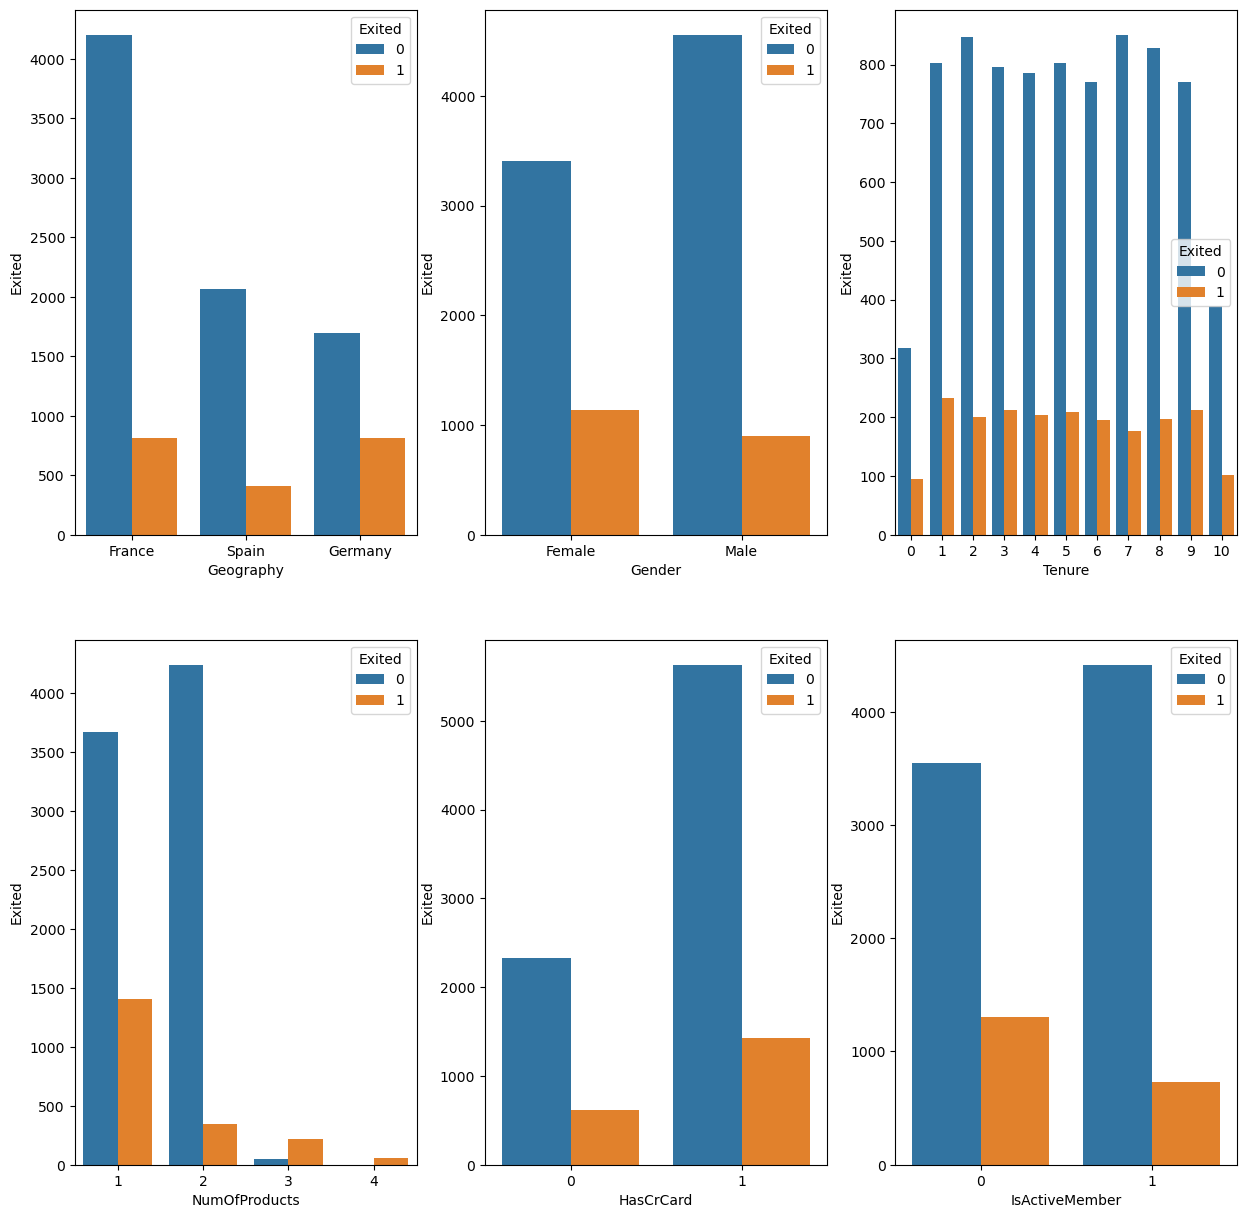

In [6]:
# A graphical representation of exited and non-exited members across different categories
# From the geographical graph, we note that france is leading with non-exited members of over 4,000 while spain and germany
# have a cumulative retained members of below 2,200. from this insight we can state that there might be favouring features
# in France that are missing in germany and spain. we can derive an assumption that The bank head office is located in  
# france which explains the low membership number from other regions.

# This also tells us that the bank has not fully integrated the basic services on their online platforms inorder to break 
# the geographical hinderance in service delivery. Spain has least exited members which shows that there are favouring
# factors in spain which should be analyzed and emulated in the other regions.

# More females are exiting the bank than males. the bank needs to come up with tailor made products that are more appealing
# to the female gender in order to promote retention.

# From the tenure graph we can tell that members with the longest tenure are least likely to exit the bank. The bank should
# therefore encourage their members to patronize with more products with long term tenure.

# a huge number of non-active clients are churning compared to active clients. the bank should therefore initiate a drive to
# sensitize clients on the benefits of actively saving and utilizing the available products.



fig, axarr = mpl.subplots(2, 3, figsize=(15, 15))
sb.barplot(x=db['Geography'], y=db['Exited'], hue=db['Exited'], estimator=len, ax = axarr[0][0])
sb.barplot(x=db['Gender'], y=db['Exited'], hue=db['Exited'], estimator=len, ax = axarr[0][1])
sb.barplot(x=db['Tenure'], y=db['Exited'], hue=db['Exited'], estimator=len, ax = axarr[0][2])
sb.barplot(x=db['NumOfProducts'], y=db['Exited'], hue=db['Exited'], estimator=len, ax = axarr[1][0])
sb.barplot(x=db['HasCrCard'], y=db['Exited'], hue=db['Exited'], estimator=len, ax = axarr[1][1])
sb.barplot(x=db['IsActiveMember'], y=db['Exited'], hue=db['Exited'], estimator=len, ax = axarr[1][2])

<Axes: xlabel='Exited', ylabel='IsActiveMember'>

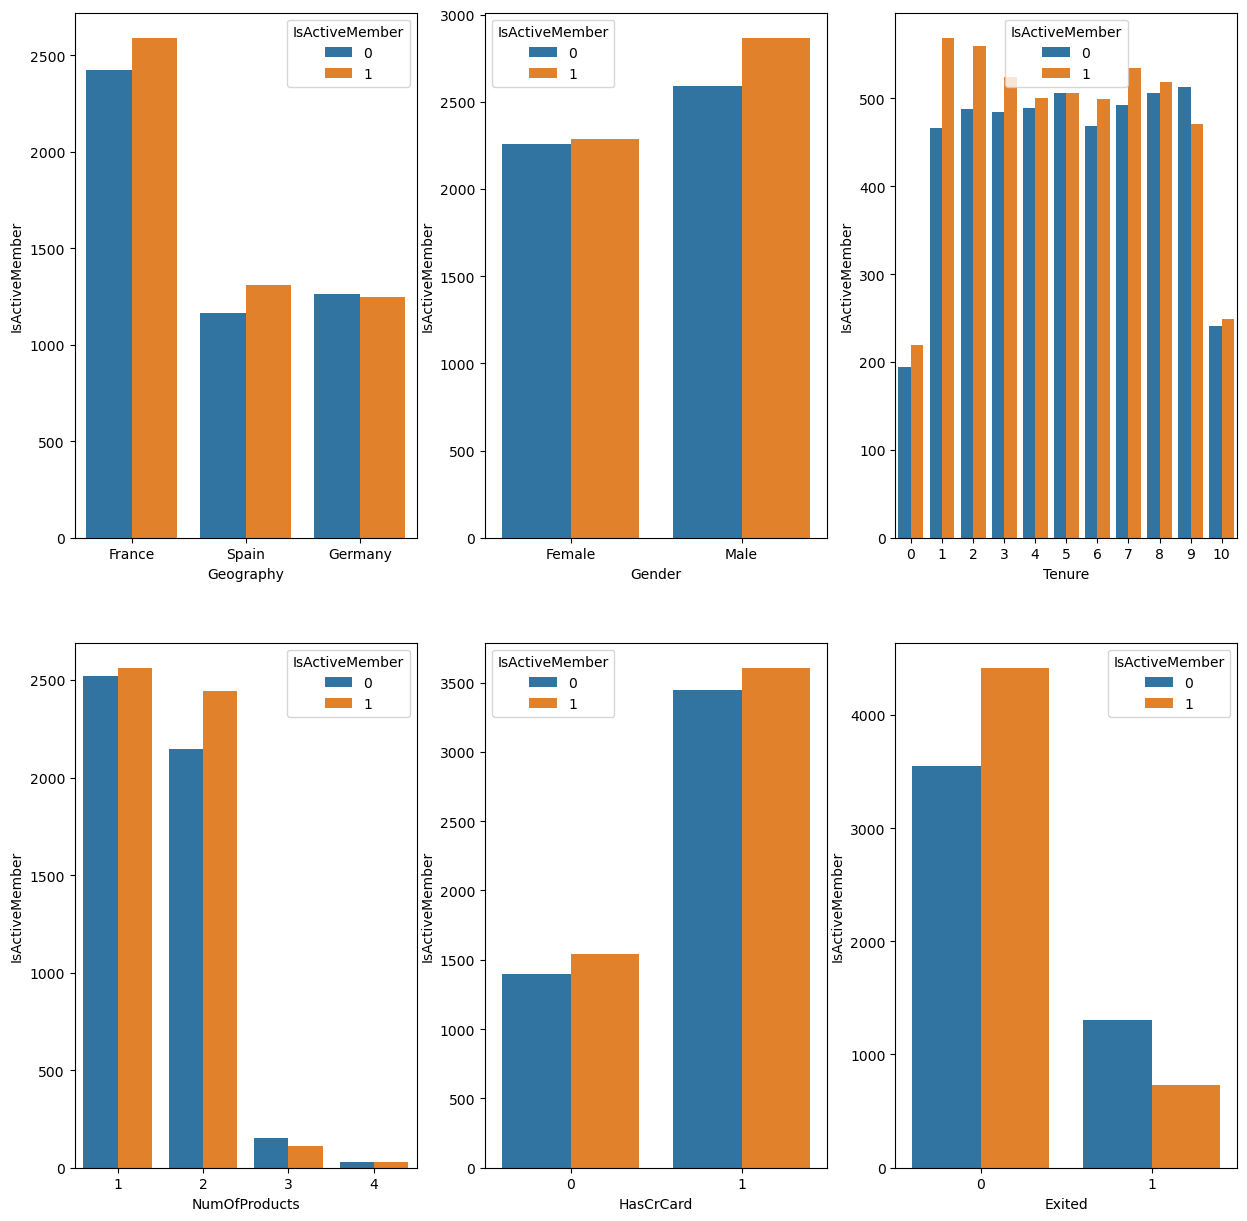

In [7]:
# A graphical representation of Active and non-Active members across different categories

fig, axarr = mpl.subplots(2, 3, figsize=(15, 15))
sb.barplot(x=db['Geography'], y=db['IsActiveMember'], hue=db['IsActiveMember'], estimator=len, ax = axarr[0][0])
sb.barplot(x=db['Gender'], y=db['IsActiveMember'], hue=db['IsActiveMember'], estimator=len, ax = axarr[0][1])
sb.barplot(x=db['Tenure'], y=db['IsActiveMember'], hue=db['IsActiveMember'], estimator=len, ax = axarr[0][2])
sb.barplot(x=db['NumOfProducts'], y=db['IsActiveMember'], hue=db['IsActiveMember'], estimator=len, ax = axarr[1][0])
sb.barplot(x=db['HasCrCard'], y=db['IsActiveMember'], hue=db['IsActiveMember'], estimator=len, ax = axarr[1][1])
sb.barplot(x=db['Exited'], y=db['IsActiveMember'], hue=db['IsActiveMember'], estimator=len, ax = axarr[1][2])

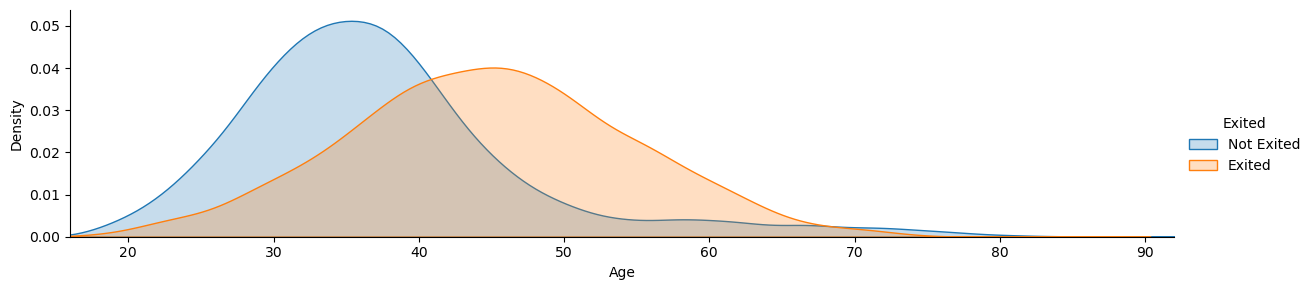

In [8]:
# A visual presentation of those who left and those who stayed against their age group

# From the graphical illustration, clients are more likely to churn from the age of 40. the bank should invest more on 
# products that favour the elderly to the retired clients in order to reduce the churn rate from age 40
import warnings
warnings.filterwarnings("ignore")
FacetGrid = sb.FacetGrid(db, hue='Exited', aspect=4)
FacetGrid.map(sb.kdeplot, 'Age', fill=True )
FacetGrid.set(xlim=(16, db['Age'].max()))
FacetGrid.add_legend(labels = ['Not Exited', 'Exited'])

Text(0, 0.5, 'Balance')

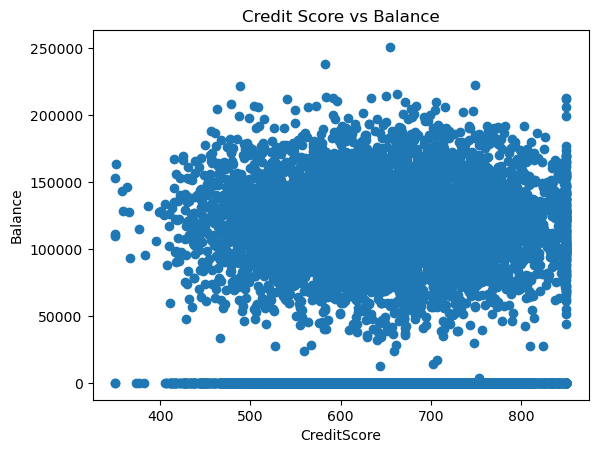

In [9]:
# Finding the relationship between credit score and the actual balance

# From the plot below, we can see a huge concentration of highest savings from clients with high credit score. The bank
# should further formulate ways to reduce defaults in order to improve credit scores which in turn promotes good savings
# habit

mpl.scatter(db.CreditScore, db.Balance)
mpl.title('Credit Score vs Balance')
mpl.xlabel('CreditScore')
mpl.ylabel('Balance')

In [10]:
# Here we get the description of the database. from the description we can tell that the oldest client is of age 92 years
# with the youngest client being 18 years old. 50% of clients ranging between the age of 37 which is the point at which we
# have the highest likelyhood of churn rate. This shows that the bank should expedite in creating products that favour the 
# elderly

# the highest earning client has a salary of 199,992.48. The lowest earner has a salary of 11.58.


db.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

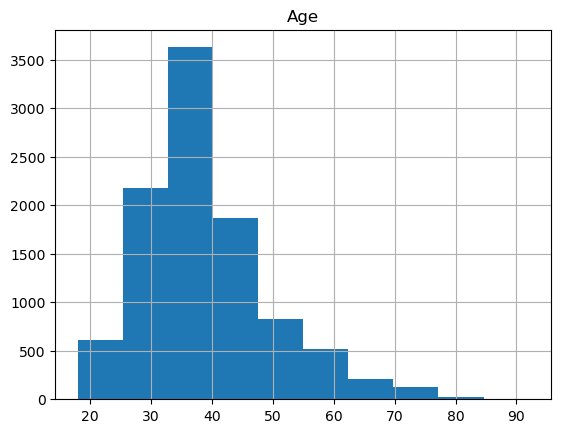

In [11]:
# A bar graph presentation to further analyze the risk of bank churn from the age of 30 to 40 which has the highest 
# concentration of clients.

db.hist('Age')

<Axes: >

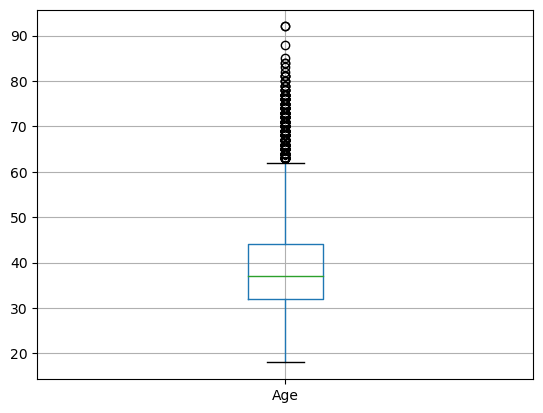

In [12]:
# Box plot representaion of the age distribution. a visualization from a different angle

db.boxplot('Age')

<Axes: >

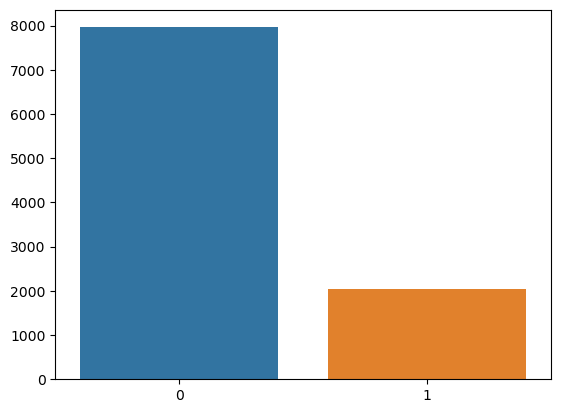

In [13]:
# This is a summary comparison between exited and active members. The total churned clients stands at around 2,000 with
# active membership totaling to around 8,000 clients

sb.barplot(x=db['Exited'].value_counts().keys(),
            y=db['Exited'].value_counts().values)

<Axes: >

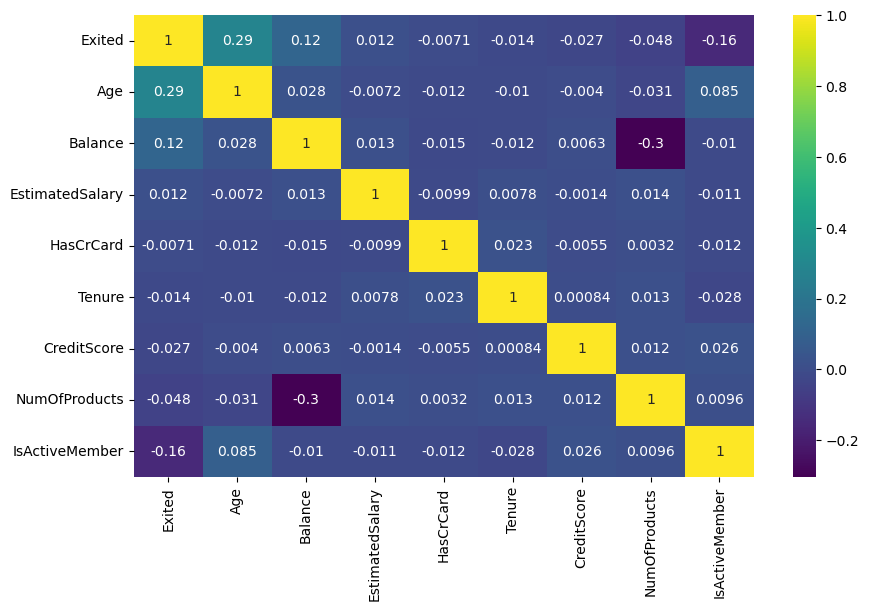

In [14]:
# Analyzing the correlations between variables with positive and negative correlations using a heatmap
# We have a positive correlation between estimated salaries and tenure, showing that high earners tend to take long term 
# products
# Those who have cards have a positive correlation of 0.0032 with the number of products. this shows that having a card
# tends to encourage clients in the uptake of products

k = 10
cols = db.corr().nlargest(k, 'Exited')['Exited'].index
cm = db[cols].corr()
mpl.figure(figsize=(10,6))
sb.heatmap(cm, annot=True, cmap = 'viridis')

In [15]:
# No duplicate entries in the database

db.duplicated().sum()

0

In [16]:
# There are no null values in the database

db.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
# A summary listing of the active members. The extracted list can be used to push customized alerts to sensitize the clients
# on new products that they can further patronize with and other benefits of being a member of the bank.

db[db['IsActiveMember']==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9986,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0
9987,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9989,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [18]:
# A summary listing of dormant members. customized alerts can be utilized to encourage the clients on the benefits of saving
# and utilizing the different products that are available in the bank

db[db['IsActiveMember']==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
10,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [19]:
# Learning patterns according to the different ages

# From the summary grouping, we can conclude that Germany and France has the highest number of elderly clients with spain
# leading in the number of youths aged from 18 to 35. The bank should therefore analyze the two regions that is Germany and
# France and find out which are the best suited products that they can introduce to encourage the elderly to reduce the
# churn rate.

db.groupby('Age').max()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,,,
18,844,Spain,Male,10,176139.50,2,1,1,197322.13,1
19,850,Spain,Male,9,166133.28,2,1,1,193008.52,1
20,850,Spain,Male,10,204223.03,2,1,1,197582.79,1
21,747,Spain,Male,10,210433.08,3,1,1,197297.77,1
22,850,Spain,Male,10,186788.96,3,1,1,198032.93,1
...,...,...,...,...,...,...,...,...,...,...
83,678,Germany,Male,6,123356.63,1,0,1,92934.41,0
84,537,Germany,Male,8,92242.34,1,1,1,188484.52,1
85,787,France,Female,10,0.00,2,1,1,116537.96,0


<Axes: >

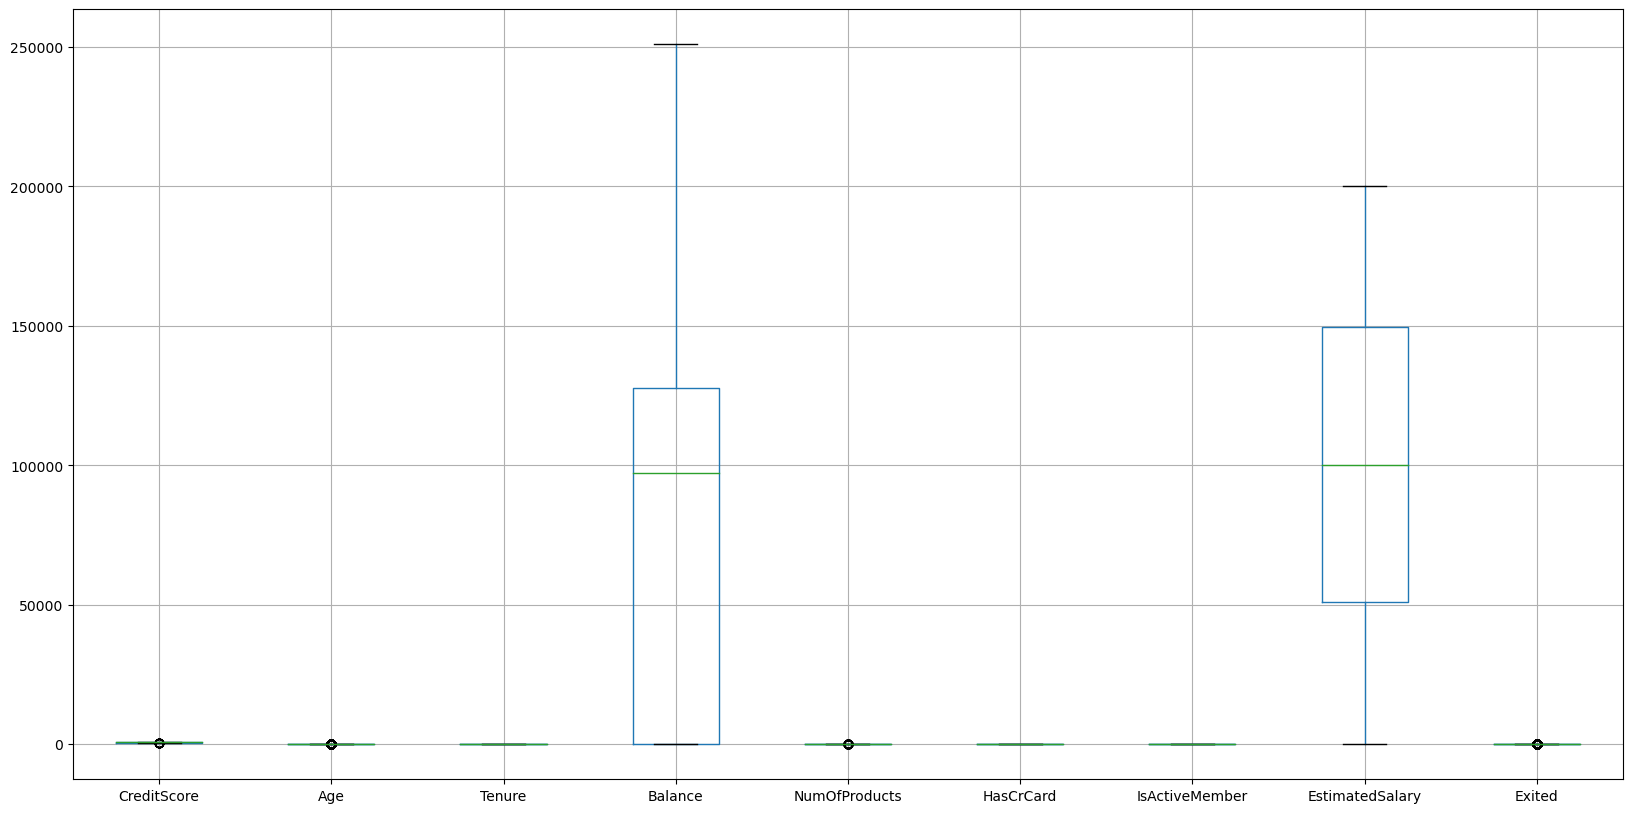

In [20]:
# Trying to detect outliers. from the graph we can see extended variations on balance and estimated salary which is normal
# and expected.

db.boxplot(figsize=(20,10))

<Axes: >

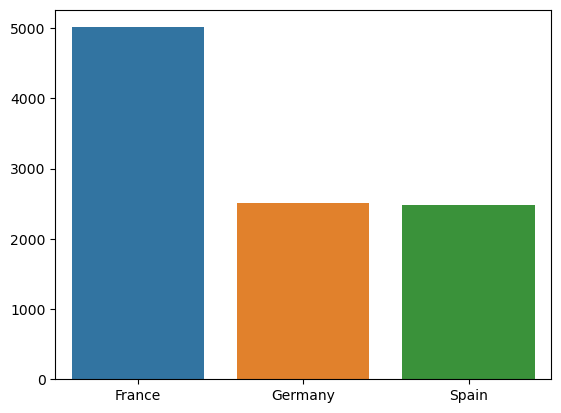

In [21]:
# Representation of countires with the most members. France leads followed by Germany and spain

sb.barplot(x=['France', 'Germany', 'Spain'],
            y=[*db['Geography'].value_counts().values])

In [22]:
# Here we use one hot encoding to transform the string vectors into numerical futures in preparation for creating the models

db = pd.get_dummies(db, columns = ['Geography','Gender'])
db.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [23]:
db.rename(columns={'Gender_Female':'Female',
                     'Gender_Male':'Male',
                     'Geography_France': 'France',
                     'Geography_Germany' : 'Germany',
                     'Geography_Spain':'Spain'}, inplace = True)
db.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [24]:
# Here we divide the dataset and specify the target column that will be used by the machine. Y is the target label while x 
# is the feature label for the supervised machine learning technique

x = db.loc[:, db.columns != 'Exited']
y = db['Exited']

In [25]:
# Here we divide our dataset into training set and testing set. The test set will be used to evaluate our models on how they
# have performed

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [27]:
# Here we build our model and train it to give us a churn prediction on the x_test dataset
# We get an accuracy score of 78.5
# In the confusion matrix we get a true positive of 2324 and true negative of 32, false positive of 56 and false negative
# of 588

Logre = LogisticRegression()
Logre.fit(x_train, y_train)
y_prediction = Logre.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, y_prediction)*100)
print('Confusion matrix = \n', confusion_matrix(y_test, y_prediction))
print('Classification report = \n', classification_report(y_test, y_prediction))

Accuracy score =  78.53333333333333
Confusion matrix = 
 [[2324   56]
 [ 588   32]]
Classification report = 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      2380
           1       0.36      0.05      0.09       620

    accuracy                           0.79      3000
   macro avg       0.58      0.51      0.48      3000
weighted avg       0.71      0.79      0.72      3000



In [28]:
# here we build a random forest classifier from the ensemble method library
# Accuracy is the measure of the number of correct predictions made by the model
# Recall evaluates the model's ability to identify positive instances from a dataset
# The F1 score is a balance between precision and recall it is useful when class distribution is imbalanced. it evaluates
# the effect of features on the performance of a model

from sklearn.ensemble import RandomForestClassifier

In [29]:
# We build our random model
# From random forest classifier we get accuracy score of 99.8. 
# a false negative of 6 from the confusion matrix

rfc = RandomForestClassifier(random_state = 10)
rfc.fit(x_train, y_train)
y_prediction2 = rfc.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, y_prediction2)*100)
print('Confusion matrix = \n', confusion_matrix(y_test, y_prediction2))
print('Classification report = \n', classification_report(y_test, y_prediction2))

Accuracy score =  85.53333333333333
Confusion matrix = 
 [[2293   87]
 [ 347  273]]
Classification report = 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2380
           1       0.76      0.44      0.56       620

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



In [30]:
# lets import the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [31]:
rfc_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 3)
rfc_gini.fit(x_train, y_train)
y_prediction3 = rfc_gini.predict(x_test)
print('Accuracy score = ', accuracy_score(y_test, y_prediction3)*100)
print('Confusion matrix = \n', confusion_matrix(y_test, y_prediction3))
print('Classification report = \n', classification_report(y_test, y_prediction3))

Accuracy score =  83.46666666666667
Confusion matrix = 
 [[2358   22]
 [ 474  146]]
Classification report = 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      2380
           1       0.87      0.24      0.37       620

    accuracy                           0.83      3000
   macro avg       0.85      0.61      0.64      3000
weighted avg       0.84      0.83      0.79      3000



<function matplotlib.pyplot.show(close=None, block=None)>

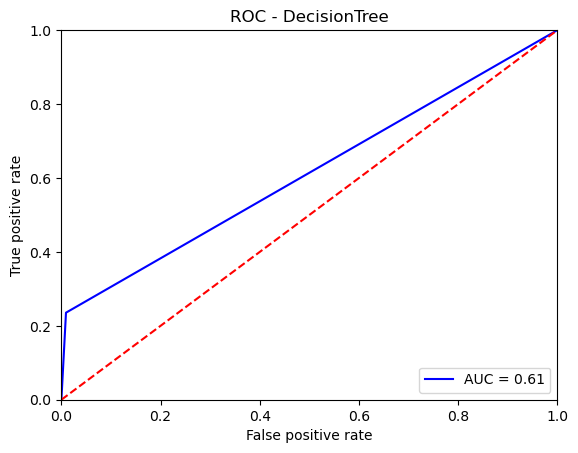

In [32]:
# ROC Area under the curve is used for evaluating the accuracy of the classification models. it used in choosing the best 
# model in relation to its outcome
# here we calculate the false positive rate and true positive rate for the decision tree classification

import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_prediction3)
roc_auc = metrics.auc(fpr, tpr)
mpl.title('ROC - DecisionTree')
mpl.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
mpl.legend(loc = 'lower right')
mpl.plot([0,1],[0,1],'r--')
mpl.xlim([0,1])
mpl.ylim([0,1])
mpl.ylabel('True positive rate')
mpl.xlabel('False positive rate')
mpl.show

<function matplotlib.pyplot.show(close=None, block=None)>

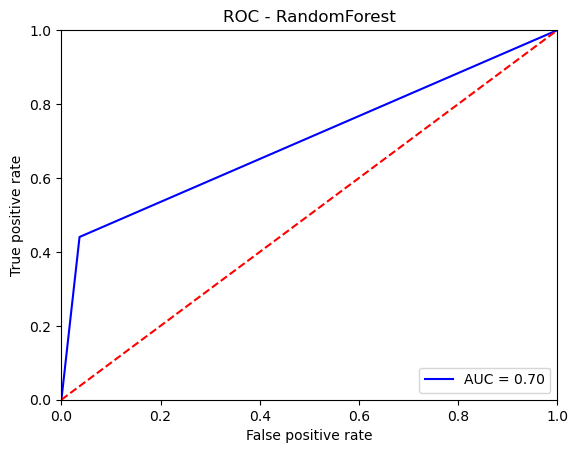

In [33]:
# here we calculate the false positive rate and true positive rate for the random forest classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prediction2)
roc_auc = metrics.auc(fpr, tpr)
mpl.title('ROC - RandomForest')
mpl.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
mpl.legend(loc = 'lower right')
mpl.plot([0,1],[0,1],'r--')
mpl.xlim([0,1])
mpl.ylim([0,1])
mpl.ylabel('True positive rate')
mpl.xlabel('False positive rate')
mpl.show

<function matplotlib.pyplot.show(close=None, block=None)>

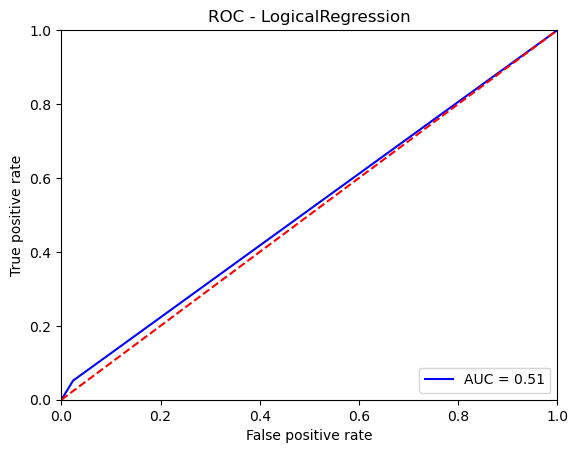

In [34]:
# here we calculate the false positive rate and true positive rate for the Logical regression classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prediction)
roc_auc = metrics.auc(fpr, tpr)
mpl.title('ROC - LogicalRegression')
mpl.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
mpl.legend(loc = 'lower right')
mpl.plot([0,1],[0,1],'r--')
mpl.xlim([0,1])
mpl.ylim([0,1])
mpl.ylabel('True positive rate')
mpl.xlabel('False positive rate')
mpl.show

In [ ]:
# From the results the best models to use is random forest which has the best accuracy levels among the three models tested